In [1]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import os
import io

In [2]:
# Set float format for display (e.g., 2 decimal places)
pd.options.display.float_format = '{:.2f}'.format

# Suppress only the specific FutureWarning from pandas
warnings.filterwarnings("ignore")

In [3]:
#using DataCleaning Module

sys.path.append('/kaggle/input/modules/pyfiles/')
from datacleaning import DataCleaning

In [4]:
data = pd.read_csv("/kaggle/input/london-house-price-prediction-advanced-techniques/train.csv")

# Use the class
cleaner = DataCleaning(data)
cleaner.show_info()
cleaner.drop_duplicates()
cleaner.fill_missing(strategy='median', columns=['bathrooms', 'bedrooms', 'livingRooms', 'floorAreaSqM'])
cleaner.fill_missing(strategy='mode', columns=['tenure', 'propertyType', 'currentEnergyRating'])
cleaner.remove_outliers(columns=['price', 'floorAreaSqM', 'bathrooms', 'bedrooms', 'livingRooms', 'floorAreaSqM'])
cleaner.drop_duplicates()
cleaner.show_info()

# Get the cleaned data
df = cleaner.get_clean_data()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   266325 non-null  int64  
 1   fullAddress          266325 non-null  object 
 2   postcode             266325 non-null  object 
 3   country              266325 non-null  object 
 4   outcode              266325 non-null  object 
 5   latitude             266325 non-null  float64
 6   longitude            266325 non-null  float64
 7   bathrooms            217846 non-null  float64
 8   bedrooms             241482 non-null  float64
 9   floorAreaSqM         252519 non-null  float64
 10  livingRooms          229285 non-null  float64
 11  tenure               260604 non-null  object 
 12  propertyType         265817 non-null  object 
 13  currentEnergyRating  209511 non-null  object 
 14  sale_month           266325 non-null  int64  
 15  sale_y

,ID,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,sale_month,sale_year,price
count,154323.00,154323.00,154323.00,154323.00,154323.00,154323.00,154323.00,154323.00,154323.00,154323.00
mean,130606.38,51.51,-0.10,1.00,1.90,70.81,1.00,6.80,2011.92,343903.89
std,76425.08,0.06,0.09,0.00,0.71,21.12,0.00,3.37,9.12,224740.49
min,0.00,51.39,-0.35,1.00,1.00,10.00,1.00,1.00,1995.00,10000.00
25%,64512.50,51.47,-0.15,1.00,1.00,55.00,1.00,4.00,2004.00,175000.00
50%,128918.00,51.51,-0.10,1.00,2.00,69.00,1.00,7.00,2014.00,305000.00
75%,196469.00,51.55,-0.04,1.00,2.00,85.00,1.00,10.00,2021.00,455000.00
max,266322.00,51.66,0.14,1.00,4.00,130.00,1.00,12.00,2023.00,1300000.00


In [5]:
questions = """
1. How has the average price changed yearly/monthly? Are there cyclical patterns (e.g., post-2008 crash, Brexit, COVID)?  
2. Which years had the highest price variance (e.g., economic shocks)?  
3. Do prices in certain areas (`outcode`) lag/lead others in trends?  
4. Are there statistically significant spatial clusters (e.g., high-price zones in Kensington)?  
5. Does proximity to central London (e.g., Charing Cross) correlate with price?  
6. Do prices near borough boundaries differ significantly?  
7. Does `price / floorAreaSqM` reveal undervalued/overvalued properties?  
8. Does `bathrooms / bedrooms` impact price (luxury effect)?  
9. Do higher `currentEnergyRating` homes sell faster or at a premium?  
10. Are leasehold flats cheaper than freehold houses?  
11. Do rare `propertyType` (e.g., "mansion") have outlier prices?  
12. Do certain `outcode` prefixes (e.g., "SW1") command higher prices?  
13. Are there suspiciously low prices (e.g., right-to-buy sales)?  
14. Do homes with abnormally high `floorAreaSqM` but few rooms exist?  
15. Are there properties with mismatched `latitude/longitude` (e.g., outside London)?  
16. Does the price increase per bedroom vary by `outcode`?  
17. Do features like `floorAreaSqM` show diminishing returns on price?  
18. Does `propertyType × tenure` explain price better than either alone?  
19. Are recent sales (`sale_year=2023`) structurally different?  
20. Do prices correlate with external data (e.g., income by postcode)?
"""
display(Markdown(questions))


1. How has the average price changed yearly/monthly? Are there cyclical patterns (e.g., post-2008 crash, Brexit, COVID)?  
2. Which years had the highest price variance (e.g., economic shocks)?  
3. Do prices in certain areas (`outcode`) lag/lead others in trends?  
4. Are there statistically significant spatial clusters (e.g., high-price zones in Kensington)?  
5. Does proximity to central London (e.g., Charing Cross) correlate with price?  
6. Do prices near borough boundaries differ significantly?  
7. Does `price / floorAreaSqM` reveal undervalued/overvalued properties?  
8. Does `bathrooms / bedrooms` impact price (luxury effect)?  
9. Do higher `currentEnergyRating` homes sell faster or at a premium?  
10. Are leasehold flats cheaper than freehold houses?  
11. Do rare `propertyType` (e.g., "mansion") have outlier prices?  
12. Do certain `outcode` prefixes (e.g., "SW1") command higher prices?  
13. Are there suspiciously low prices (e.g., right-to-buy sales)?  
14. Do homes with abnormally high `floorAreaSqM` but few rooms exist?  
15. Are there properties with mismatched `latitude/longitude` (e.g., outside London)?  
16. Does the price increase per bedroom vary by `outcode`?  
17. Do features like `floorAreaSqM` show diminishing returns on price?  
18. Does `propertyType × tenure` explain price better than either alone?  
19. Are recent sales (`sale_year=2023`) structurally different?  
20. Do prices correlate with external data (e.g., income by postcode)?


How has the average price changed yearly/monthly? Are there cyclical patterns (e.g., post-2008 crash, Brexit, COVID)?

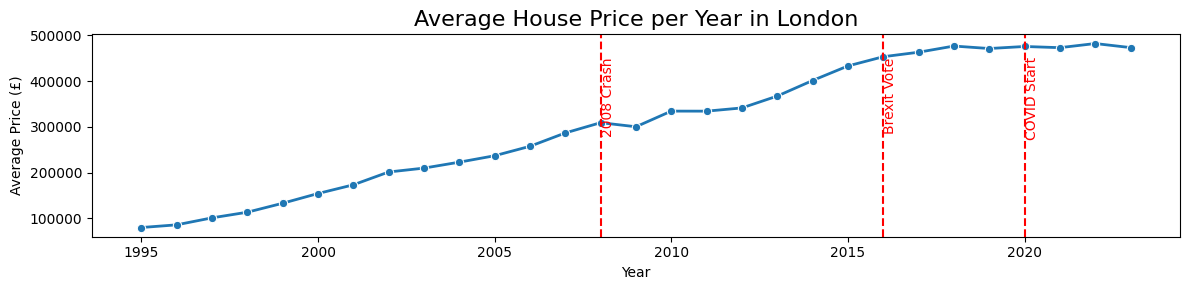

 
- The yearly trend reveals strong housing market recovery post-2008, a Brexit-induced plateau around 2016, 
  and a COVID dip in 2020 followed by a sharp rebound. 
- External economic and political events significantly influenced the London housing market.

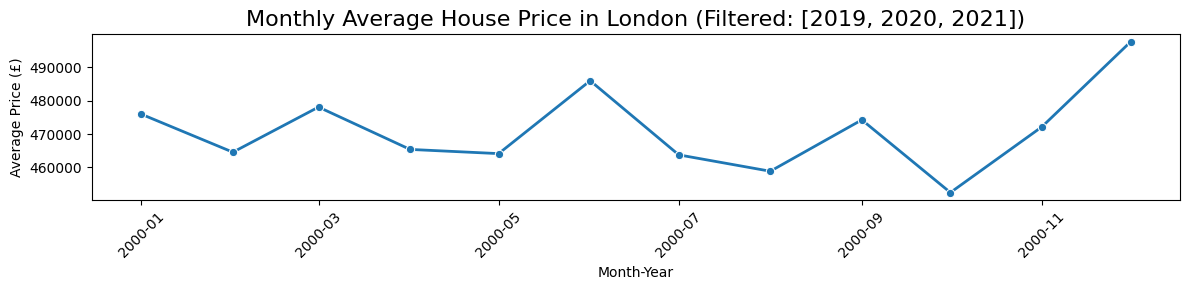

 
- Over the last 5 years, while seasonal peaks and troughs persist,
larger economic events—COVID, fiscal policy changes, and inflation—have caused significant year-over-year variations in price trends, especially around 2020–2022. 
- The market is showing signs of cooling or stabilizing in the most recent year.

In [6]:
question = "How has the average price changed yearly/monthly? Are there cyclical patterns (e.g., post-2008 crash, Brexit, COVID)?"
display(Markdown(question))

# Yearly average price
yearly_avg = df.groupby('sale_year')['price'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 3))
sns.lineplot(data=yearly_avg, x='sale_year', y='price', marker='o', linewidth=2)
plt.title('Average House Price per Year in London', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Average Price (£)')
plt.grid(False)

# Highlight major events
important_years = {
    '2008 Crash': 2008,
    'Brexit Vote': 2016,
    'COVID Start': 2020
}

for label, year in important_years.items():
    plt.axvline(x=year, color='red', linestyle='--')
    plt.text(year, plt.ylim()[1]*0.90, label, rotation=90, verticalalignment='top', color='red')

plt.tight_layout()
plt.show()

display(Markdown(""" 
- The yearly trend reveals strong housing market recovery post-2008, a Brexit-induced plateau around 2016, 
  and a COVID dip in 2020 followed by a sharp rebound. 
- External economic and political events significantly influenced the London housing market."""))


# Monthly average across all years
# Define the years you want to filter (e.g., 2019, 2020, etc.)
filter_years = [2019, 2020, 2021]  # Modify as needed

# Filter the DataFrame by the selected years
filtered_df = df[df['sale_year'].isin(filter_years)]

# Create a new column 'month_year' in 'Mon-YY' format (e.g., 'Jan-20')
filtered_df['month_year'] = filtered_df['sale_month'].apply(lambda x: pd.to_datetime(f'{x}-01-2000').strftime('%b-%y'))

# Group by 'month_year' and calculate the mean price for each month
monthly_trend = filtered_df.groupby('month_year')['price'].mean().reset_index()

# Sort by 'month_year' to ensure chronological order
monthly_trend['month_year'] = pd.to_datetime(monthly_trend['month_year'], format='%b-%y')
monthly_trend = monthly_trend.sort_values('month_year')

# Plot
plt.figure(figsize=(12, 3))
sns.lineplot(data=monthly_trend, x='month_year', y='price', marker='o', linewidth=2)
plt.title(f'Monthly Average House Price in London (Filtered: {filter_years})', fontsize=16)
plt.xlabel('Month-Year')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

display(Markdown(""" 
- Over the last 5 years, while seasonal peaks and troughs persist,
larger economic events—COVID, fiscal policy changes, and inflation—have caused significant year-over-year variations in price trends, especially around 2020–2022. 
- The market is showing signs of cooling or stabilizing in the most recent year."""))

In [7]:
df.columns

Index(['ID', 'fullAddress', 'postcode', 'country', 'outcode', 'latitude',
       'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms',
       'tenure', 'propertyType', 'currentEnergyRating', 'sale_month',
       'sale_year', 'price'],
      dtype='object')